In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
# Load the Titanic dataset
file_path = "tips-expt4 - tips-expt4.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


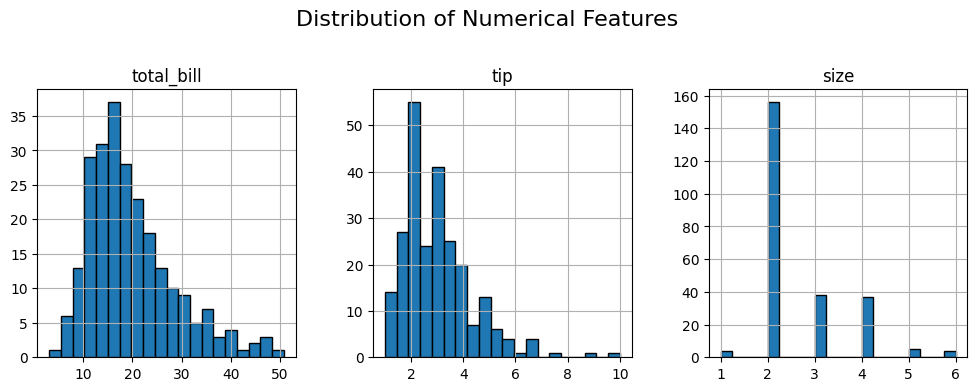

<ipython-input-4-200862e7d7c5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["total_bill"], ax=axes[0], palette="pastel")
<ipython-input-4-200862e7d7c5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["tip"], ax=axes[1], palette="pastel")


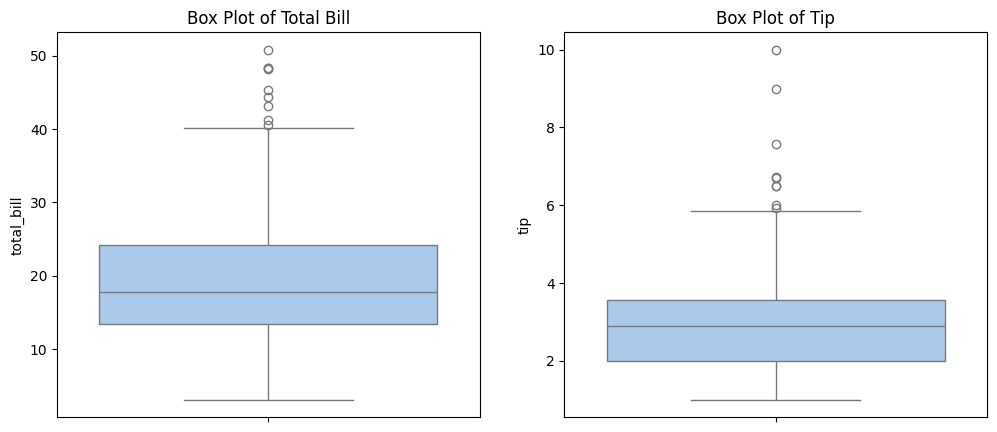

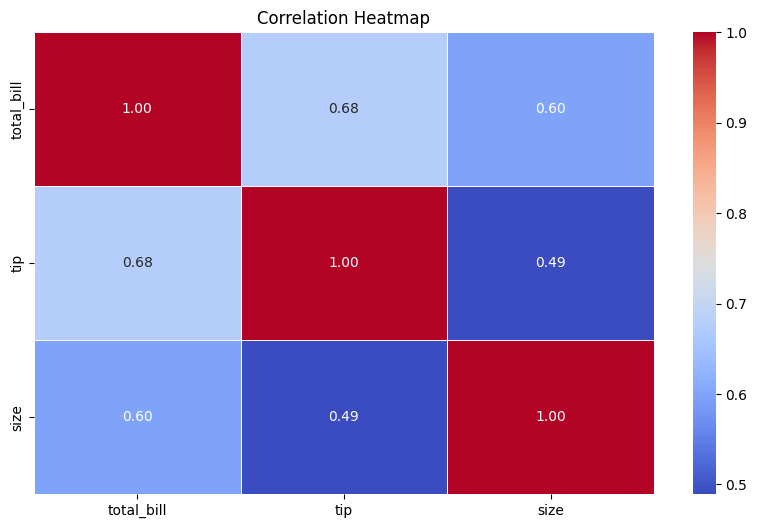

<ipython-input-4-200862e7d7c5>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_bin = df.groupby("bill_bin")["tip"].mean().reset_index()
<ipython-input-4-200862e7d7c5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bill_bin", y="tip", data=avg_tip_by_bin, palette="coolwarm")


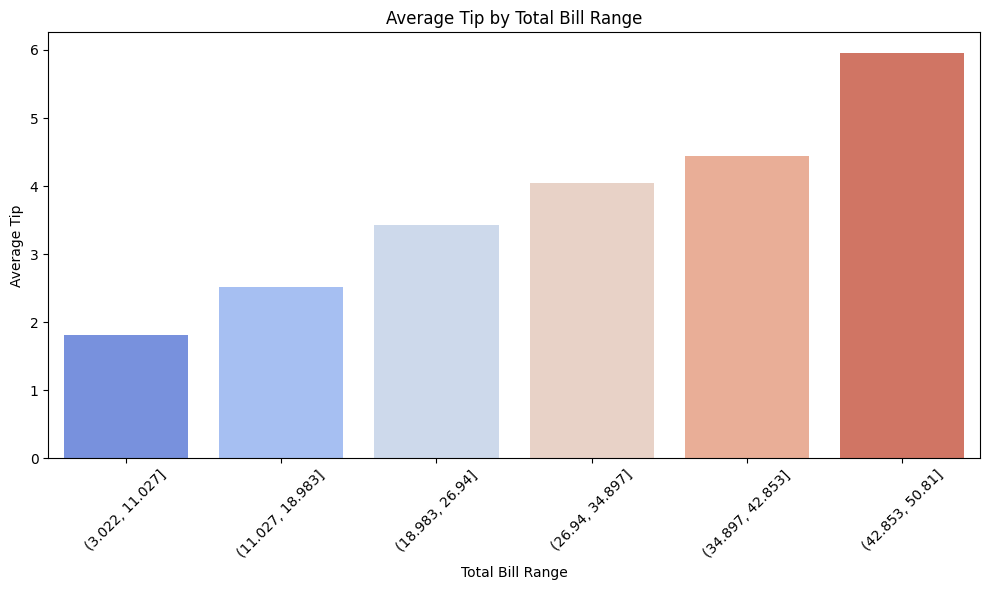

<ipython-input-4-200862e7d7c5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day", y="tip", data=df, palette="coolwarm")


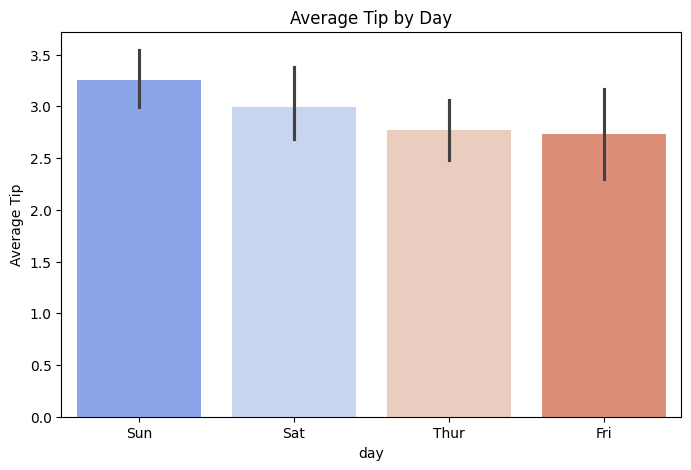

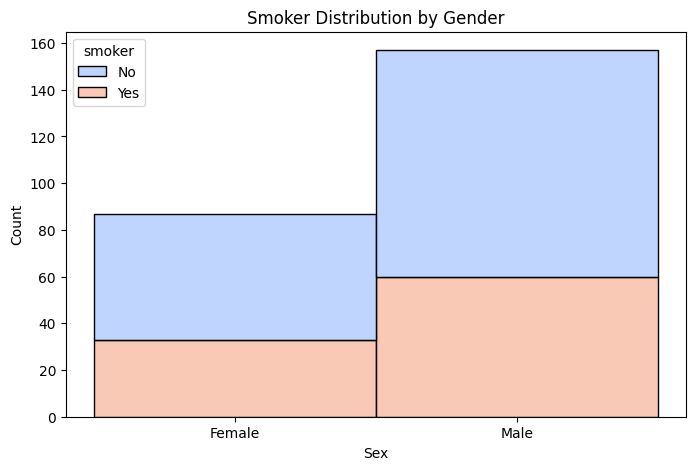

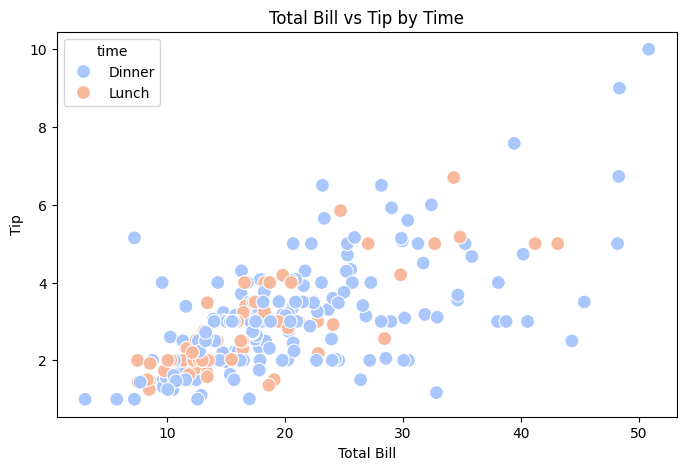

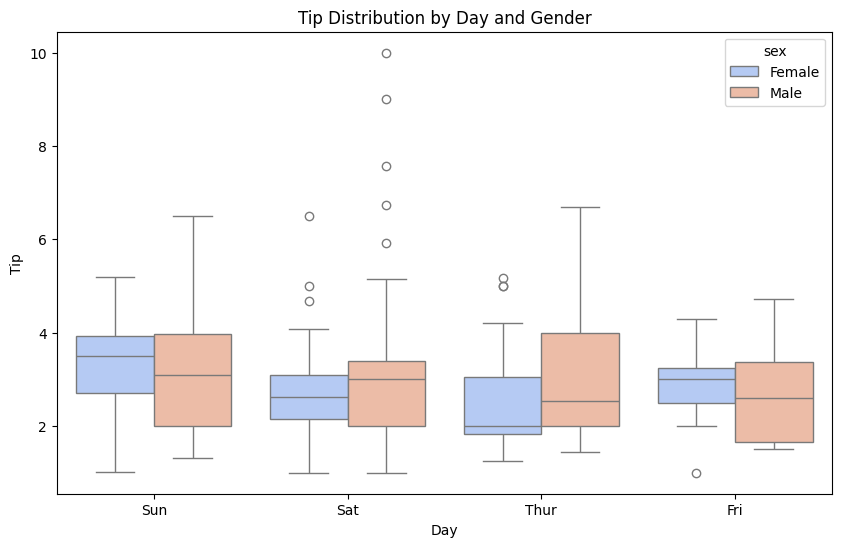

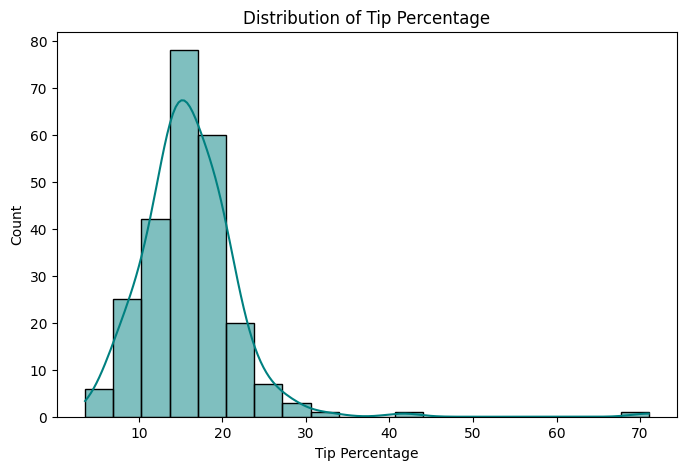

In [4]:
# Histogram for numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor='black', layout=(2, 3))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Box plots for total_bill and tip to identify outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["total_bill"], ax=axes[0], palette="pastel")
axes[0].set_title("Box Plot of Total Bill")
sns.boxplot(y=df["tip"], ax=axes[1], palette="pastel")
axes[1].set_title("Box Plot of Tip")
plt.show()

# Heatmap to show correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Bar plot: Average tip by total bill range
df["bill_bin"] = pd.cut(df["total_bill"], bins=6)
avg_tip_by_bin = df.groupby("bill_bin")["tip"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="bill_bin", y="tip", data=avg_tip_by_bin, palette="coolwarm")
plt.title("Average Tip by Total Bill Range")
plt.xlabel("Total Bill Range")
plt.ylabel("Average Tip")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for average tip by day
plt.figure(figsize=(8, 5))
sns.barplot(x="day", y="tip", data=df, palette="coolwarm")
plt.title("Average Tip by Day")
plt.ylabel("Average Tip")
plt.show()

# Stacked bar plot: smokers vs non-smokers by gender
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="sex", hue="smoker", multiple="stack", palette="coolwarm")
plt.title("Smoker Distribution by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()



# Scatter plot: Total bill vs tip colored by time
plt.figure(figsize=(8, 5))
sns.scatterplot(x="total_bill", y="tip", hue="time", data=df, palette="coolwarm", s=100)
plt.title("Total Bill vs Tip by Time")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

# Box plot: Tip by day and gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="day", y="tip", hue="sex", data=df, palette="coolwarm")
plt.title("Tip Distribution by Day and Gender")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.show()

# Tip percentage feature
df["tip_pct"] = df["tip"] / df["total_bill"] * 100

plt.figure(figsize=(8, 5))
sns.histplot(df["tip_pct"], bins=20, kde=True, color='teal')
plt.title("Distribution of Tip Percentage")
plt.xlabel("Tip Percentage")
plt.ylabel("Count")
plt.show()

